In [ ]:
%load_ext autoreload
%autoreload 2

import pathlib
import pickle
import os

import numpy as np
import pandas as pd

from scipy import signal

import mne
from matplotlib import pyplot as plt

import constants
import dataset
import folders
import iter_topography_fork
import analysis_and_plotting_functions as aps



In [ ]:
plt.rcParams['figure.figsize'] = [12,6]



In [ ]:
# Load dataset into memory (if short of memory, use preload=False)
ds = dataset.DatasetReader(data_path=folders.database_path_car, preload=True)


In [ ]:
ds = dataset.DatasetReader(data_path=folders.database_path, preload=True)


In [ ]:
# target vs nontarget -- for illiustration of the method
target = []
nontarget = []
condition_names = ['target', 'nontarget']

for user in set(ds.markup['user']):
    subset_user= ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8')
                                ]
    ep=aps.subset(ds, subset_user)

    target.append(ep['target'].drop_channels(['ecg', 'A1', 'A2']))
    nontarget.append(ep['nontarget'].drop_channels(['ecg', 'A1', 'A2']))


X = [np.array([a.data.T for a in target]), 
     np.array([a.data.T for a in nontarget])]
info = nontarget[0].info
times = nontarget[0].times * 1e3

stats = aps.cluster_and_plot(X, info, times,  condition_names=condition_names,
                    threshold=None, n_permutations=1000, tail=0, n_jobs=1)


In [ ]:
# nontarget right vs left for sighted
right_hand = []
left_hand = []
condition_names = ['left_hand', 'right_hand']

for user in set(ds.markup.loc[ds.markup['blind'] == 0]['user']): 
    subset_right = ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8') &
                                (ds.markup['finger'].isin([7,6,5,4]))
                                ]

    subset_left = ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8') &
                                (ds.markup['finger'].isin([0,1,2,3]))
                                ]

    right_hand.append(aps.subset(ds, subset_right)['nontarget'].crop(tmax=0.3).drop_channels(['ecg', 'A1', 'A2']))
    left_hand.append(aps.subset(ds, subset_left)['nontarget'].crop(tmax=0.3).drop_channels(['ecg', 'A1', 'A2']))


X = [np.array([a.data.T for a in left_hand]), 
    np.array([a.data.T for a in right_hand])]
info = left_hand[0].info
times = left_hand[0].times * 1e3

stats = aps.cluster_and_plot(X, info, times,  condition_names=condition_names,
                    threshold=None, n_permutations=1000, tail=0, n_jobs=4)



In [ ]:
# nontarget right vs left for blind
right_hand = []
left_hand = []
condition_names = ['left_hand', 'right_hand']

for user in set(ds.markup.loc[ds.markup['blind'] == 1]['user']): 
    subset_right = ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8') &
                                (ds.markup['finger'].isin([7,6,5,4]))
                                ]

    subset_left = ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8') &
                                (ds.markup['finger'].isin([0,1,2,3]))
                                ]

    right_hand.append(aps.subset(ds, subset_right)['nontarget'].crop(tmax=0.3).drop_channels(['ecg', 'A1', 'A2']))
    left_hand.append(aps.subset(ds, subset_left)['nontarget'].crop(tmax=0.3).drop_channels(['ecg', 'A1', 'A2']))


X = [np.array([a.data.T for a in left_hand]), 
    np.array([a.data.T for a in right_hand])]
info = left_hand[0].info
times = left_hand[0].times * 1e3

stats = aps.cluster_and_plot(X, info, times,  condition_names=condition_names,
                    threshold=None, n_permutations=1000, tail=0, n_jobs=4)



In [ ]:
# nontarget right vs left for all
right_hand = []
left_hand = []
condition_names = ['left_hand', 'right_hand']

for user in set(ds.markup['user']):
    
    subset_right = ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8') &
                                (ds.markup['finger'].isin([7,6,5,4]))
                                ]

    subset_left = ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8') &
                                (ds.markup['finger'].isin([0,1,2,3]))
                                ]

    right_hand.append(aps.subset(ds, subset_right)['nontarget'].crop(tmax=0.3).drop_channels(['ecg', 'A1', 'A2']))
    left_hand.append(aps.subset(ds, subset_left)['nontarget'].crop(tmax=0.3).drop_channels(['ecg', 'A1', 'A2']))


X = [np.array([a.data.T for a in left_hand]), 
    np.array([a.data.T for a in right_hand])]
info = left_hand[0].info
times = left_hand[0].times * 1e3

stats = aps.cluster_and_plot(X, info, times,  condition_names=condition_names,
                    threshold=None, n_permutations=1000, tail=0, n_jobs=4)



In [ ]:
# target blind vs sighted
blind = []
sighted = []
condition_names = ['blind', 'sighted']


for user in set(ds.markup.loc[ds.markup['blind'] == 1]['user']):
    subset_blind = ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8')
                                ]
    blind.append(aps.subset(ds, subset_blind)['delta'].crop(tmax=0.8).drop_channels(['ecg', 'A1', 'A2']))

for user in set(ds.markup.loc[ds.markup['blind'] == 0]['user']):
    subset_sighted = ds.markup.loc[ (ds.markup['user'] == user) &
                                (ds.markup['reg'] == 'brl_static6_all8')
                                ]
    sighted.append(aps.subset(ds, subset_sighted)['delta'].crop(tmax=0.8).drop_channels(['ecg', 'A1', 'A2']))



X = [np.array([a.data.T for a in blind]), 
    np.array([a.data.T for a in sighted])]
info = blind[0].info
times = blind[0].times * 1e3

stats = aps.cluster_and_plot(X, info, times, condition_names=condition_names,
                    threshold=None, n_permutations=1000, tail=1, n_jobs=4)



C:\Users\User\Miniconda3\lib\site-packages\mne\stats\parametric.py:129: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Projects\Work\sensortech\brlbci\brlbci_analysis\analysis_and_plotting_functions.py:243: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  step_down_p=step_down_p
C:\Users\User\Miniconda3\lib\site-packages\mne\stats\cluster_level.py:425: RuntimeWarning: invalid value encountered in greater
  x_ins = [np.logical_and(x > thresh, include)]


[............................................................] 100.00%  |
[0.432 0.912 0.997 0.561 0.181 0.003 0.201 0.019 0.914 0.999 0.441 0.999
 0.999 0.999 0.729 0.997 0.997 0.274 0.996 0.994 0.66  0.352 0.997]
Mean F-score for cluster 1.8101887532247052
Cluster channels ['CP4', 'CP6', 'P2', 'P4', 'P6', 'P8', 'POz', 'PO4', 'PO8', 'Oz', 'O2']


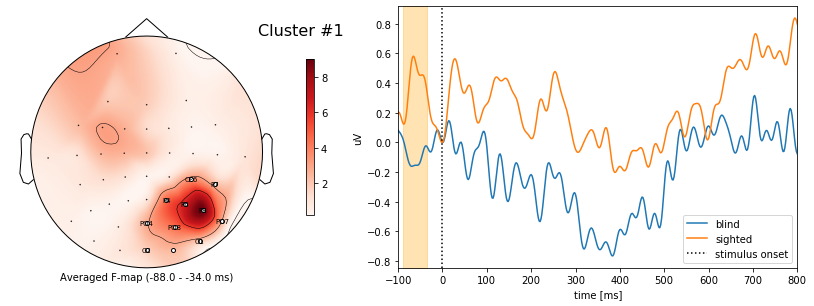

Mean F-score for cluster 2.1843492686104367
Cluster channels ['Fp1', 'F3', 'FC5', 'FC3', 'FC1', 'C3', 'C1']


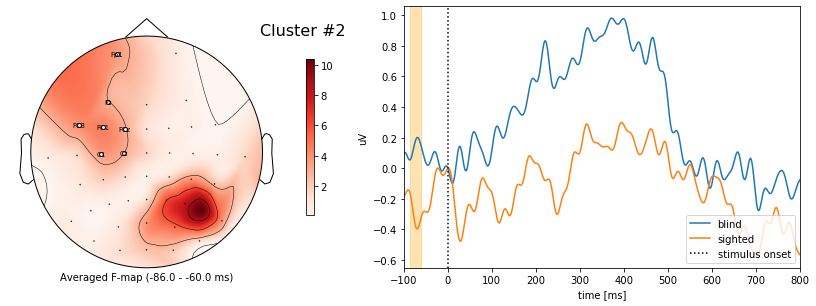

Mean F-score for cluster 1.1422737698409196
Cluster channels ['FCz', 'FC2', 'Cz', 'C2']


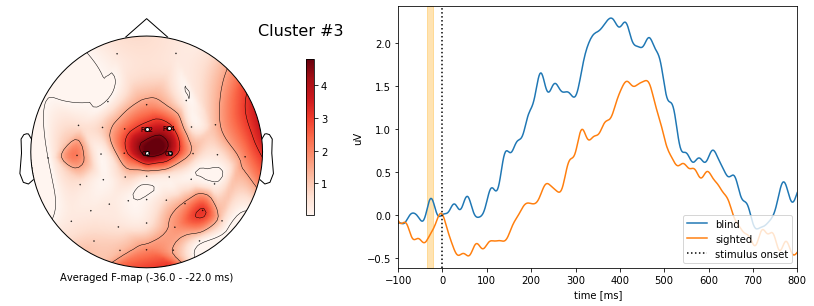

Mean F-score for cluster 2.5078870606221493
Cluster channels ['CP4', 'CP6', 'P4', 'P6', 'P8', 'PO4', 'PO8', 'O1', 'Oz', 'O2']


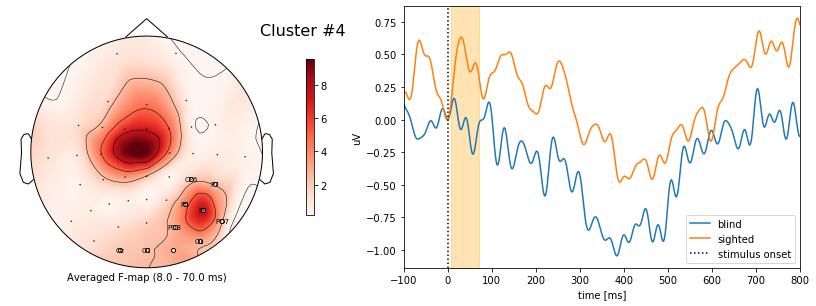

Mean F-score for cluster 2.5678041168181283
Cluster channels ['F3', 'Fz', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'C3', 'C1', 'Cz', 'C2', 'CP3', 'CP1', 'CPz']


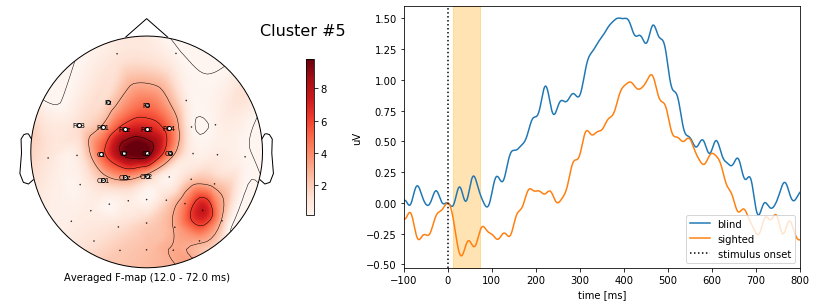

Mean F-score for cluster 3.8006225313634845
Cluster channels ['Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C3', 'C1', 'Cz', 'C2', 'C4']


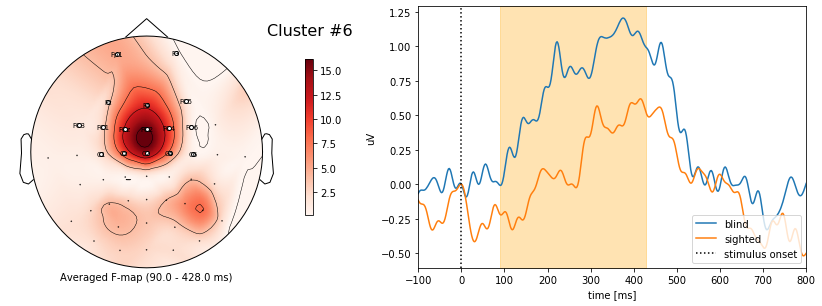

Mean F-score for cluster 3.39197075151597
Cluster channels ['CP4', 'CP6', 'P3', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']


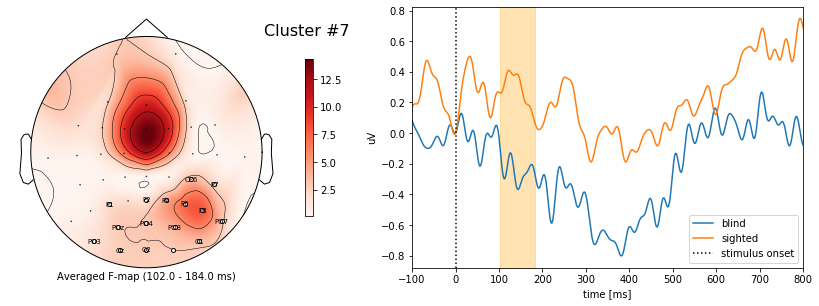

Mean F-score for cluster 3.5767672748801393
Cluster channels ['FC6', 'C5', 'C6', 'CP5', 'CP3', 'CP4', 'CP6', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']


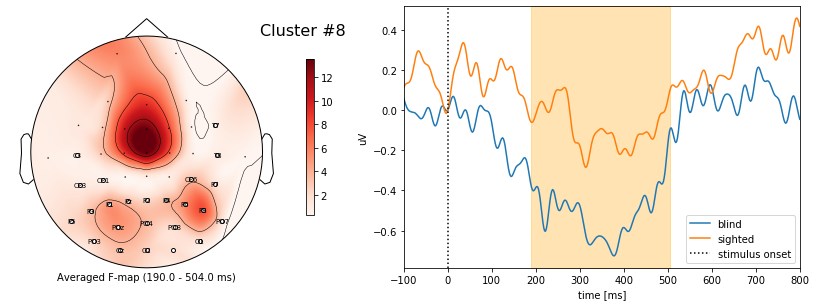

Mean F-score for cluster 2.024193785988775
Cluster channels ['Fp1']


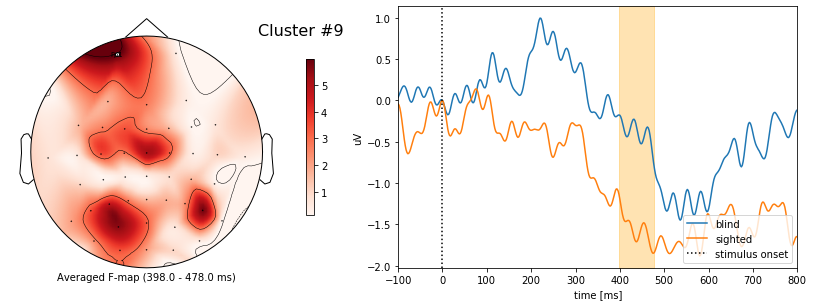

Mean F-score for cluster 1.9418569696870978
Cluster channels ['FC3', 'FC1', 'C3']


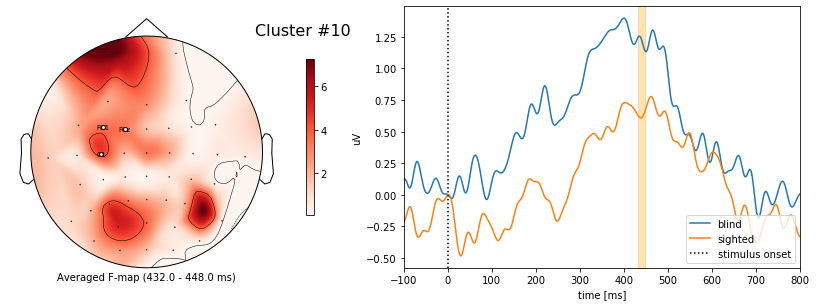

Mean F-score for cluster 1.6377308904229797
Cluster channels ['C3', 'C1', 'Cz', 'C2', 'C4', 'CP2']


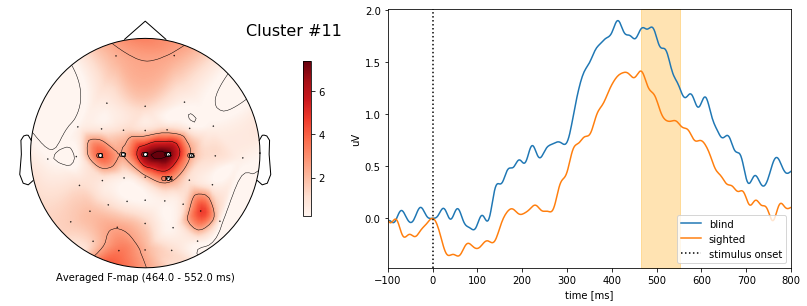

Mean F-score for cluster 2.163096931270196
Cluster channels ['PO3', 'O1', 'Oz']


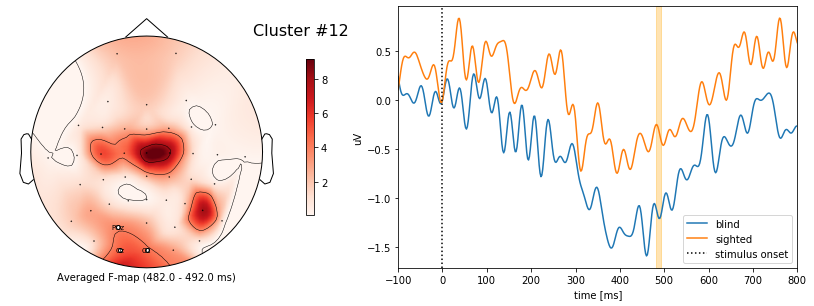

Mean F-score for cluster 1.8376790711136843
Cluster channels ['C3']


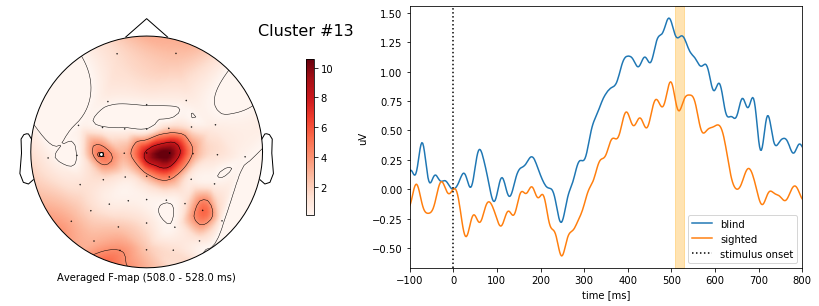

Mean F-score for cluster 1.8134880732501784
Cluster channels ['P6']


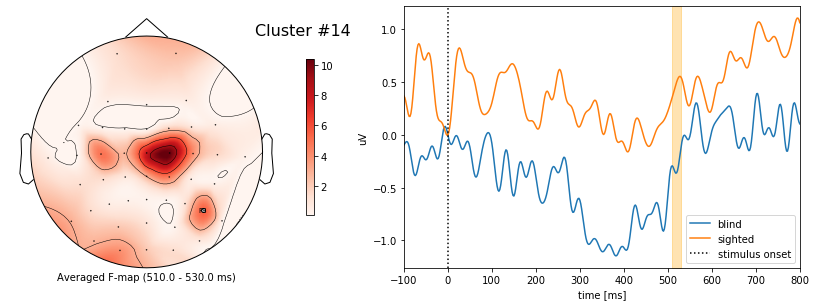

Mean F-score for cluster 1.4455179331799617
Cluster channels ['Cz', 'C2', 'CP2']


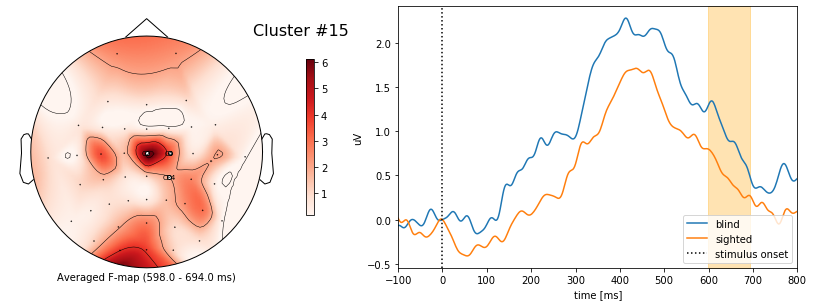

Mean F-score for cluster 1.2897354388979538
Cluster channels ['O1', 'Oz']


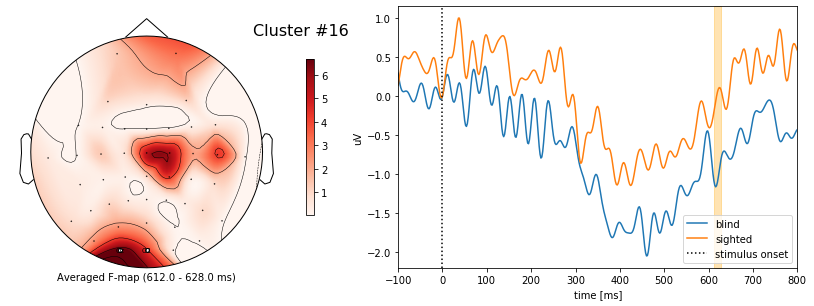

Mean F-score for cluster 1.648514931371421
Cluster channels ['C3']


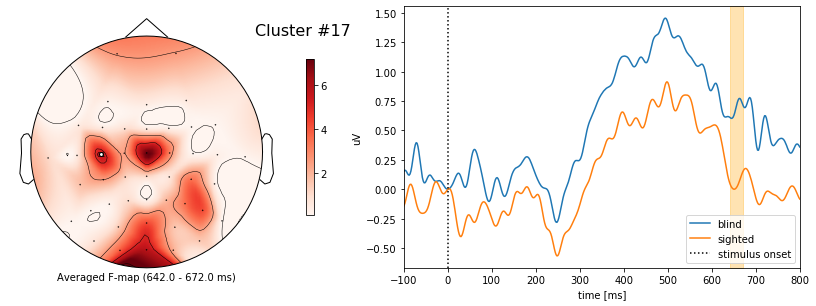

Mean F-score for cluster 1.6055780709977407
Cluster channels ['CP4', 'P2', 'P4', 'P6', 'PO3', 'POz', 'O1', 'Oz']


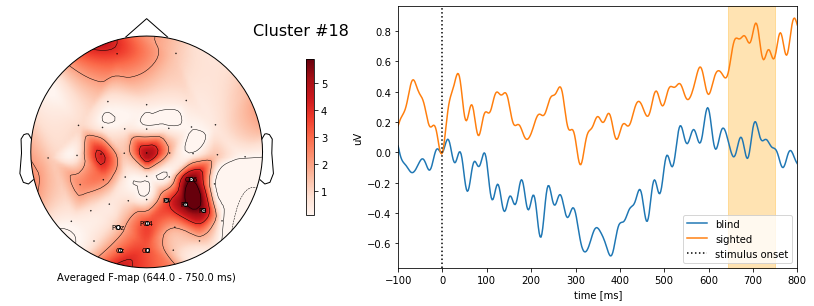

Mean F-score for cluster 1.6503455948582466
Cluster channels ['Fp1']


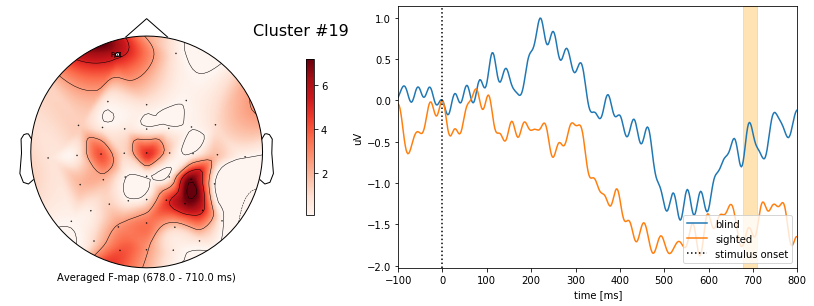

Mean F-score for cluster 1.638817686516455
Cluster channels ['C3', 'CP5', 'CP3']


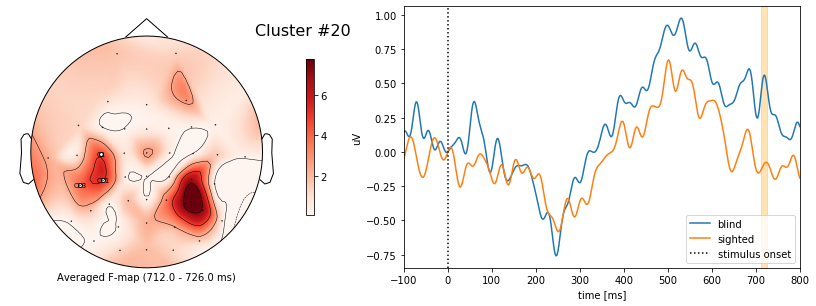

Mean F-score for cluster 2.177789552773324
Cluster channels ['FCz', 'FC2', 'FC4', 'FC6', 'Cz', 'C2', 'C4', 'C6']


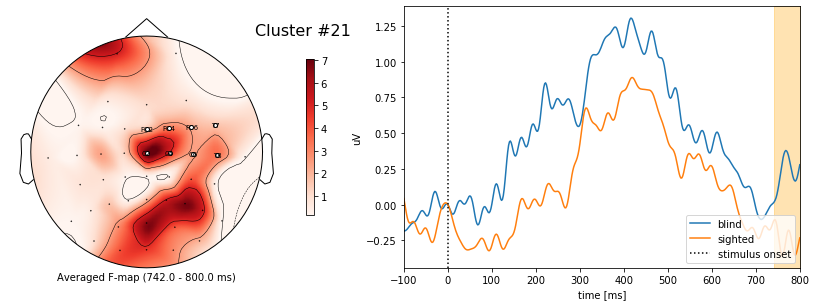

Mean F-score for cluster 2.3683293188209436
Cluster channels ['C6', 'CP4', 'P2', 'P4', 'P6', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']


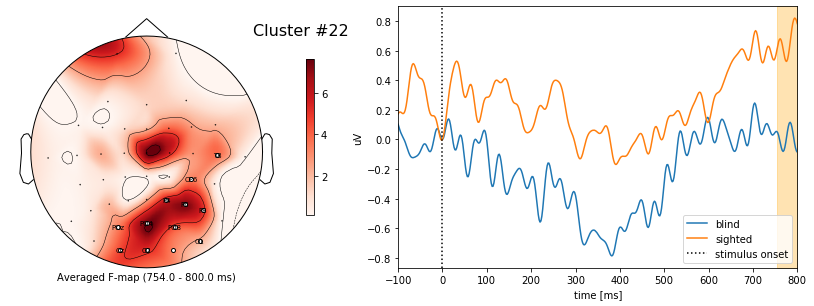

Mean F-score for cluster 2.381122142844335
Cluster channels ['Fp1']


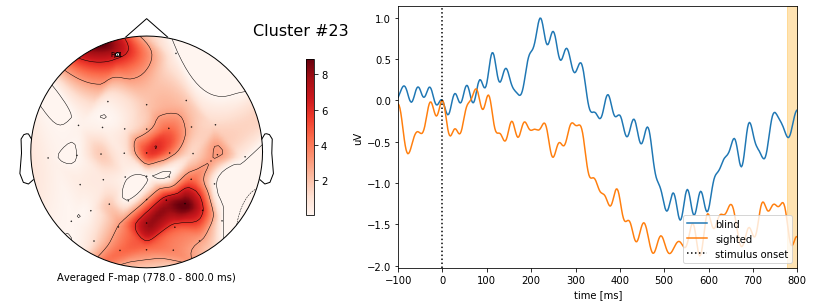

In [8]:
# target blind vs sighted - letter averaged
blind = []
sighted = []
condition_names = ['blind', 'sighted']


for user in set(ds.markup.loc[ds.markup['blind'] == 1]['user']):
    for session in set(ds.markup.loc[ds.markup['user'] == user]['session_id']):
        subset_blind = ds.markup.loc[   (ds.markup['user'] == user) &
                                        (ds.markup['reg'] == 'brl_static6_all8') &
                                        (ds.markup['session_id'] == session)
                                    ]
        blind.append(aps.subset(ds, subset_blind)['delta'].crop(tmax=0.8).drop_channels(['ecg', 'A1', 'A2']))

for user in set(ds.markup.loc[ds.markup['blind'] == 0]['user']):
    for session in set(ds.markup.loc[ds.markup['user'] == user]['session_id']):
        subset_sighted = ds.markup.loc[ (ds.markup['user'] == user) &
                                        (ds.markup['reg'] == 'brl_static6_all8') &
                                        (ds.markup['session_id'] == session)
                                    ]
        sighted.append(aps.subset(ds, subset_sighted)['delta'].crop(tmax=0.8).drop_channels(['ecg', 'A1', 'A2']))


X = [np.array([a.data.T for a in blind]), 
    np.array([a.data.T for a in sighted])]
info = blind[0].info
times = blind[0].times * 1e3

stats = aps.cluster_and_plot(X, info, times, condition_names=condition_names,
                    threshold=None, n_permutations=1000, tail=1, n_jobs=1, cutoff_pval=1)


[                                                            ]   0.10%  |

C:\Users\User\Miniconda3\lib\site-packages\mne\stats\parametric.py:129: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Projects\Work\sensortech\brlbci\brlbci_analysis\analysis_and_plotting_functions.py:243: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  step_down_p=step_down_p
C:\Users\User\Miniconda3\lib\site-packages\mne\stats\cluster_level.py:425: RuntimeWarning: invalid value encountered in greater
  x_ins = [np.logical_and(x > thresh, include)]


[............................................................] 100.00%  |
[0.039 0.001 0.012]
Mean F-score for cluster 1.9664833350064852
Cluster channels ['Fp1', 'F3', 'Fz', 'F4', 'FC5', 'FC1', 'FCz', 'FC4', 'FC6', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CPz', 'CP4', 'CP6', 'P4', 'P6']


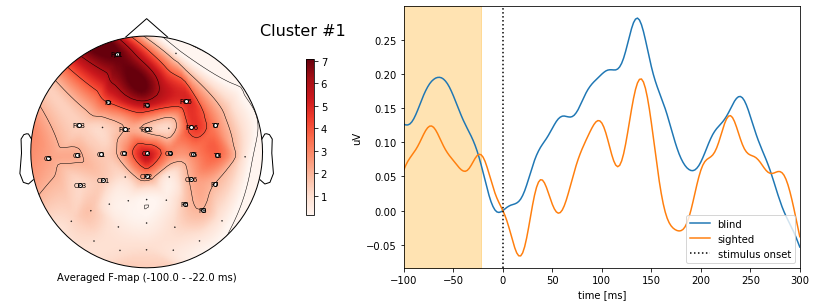

Mean F-score for cluster 4.124526716731826
Cluster channels ['Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'T7', 'C5', 'C3', 'C1', 'C2', 'C4', 'C6', 'CPz', 'CP2', 'CP4', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']


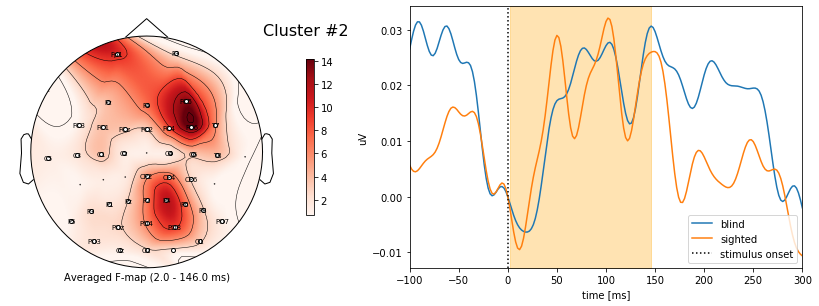

Mean F-score for cluster 2.484787232253877
Cluster channels ['Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'FC3', 'FCz', 'FC2', 'FC4', 'FC6', 'T7', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CPz', 'CP4', 'CP6', 'P7', 'P5', 'P6', 'PO7', 'PO3', 'PO4', 'PO8', 'O1', 'Oz', 'O2']


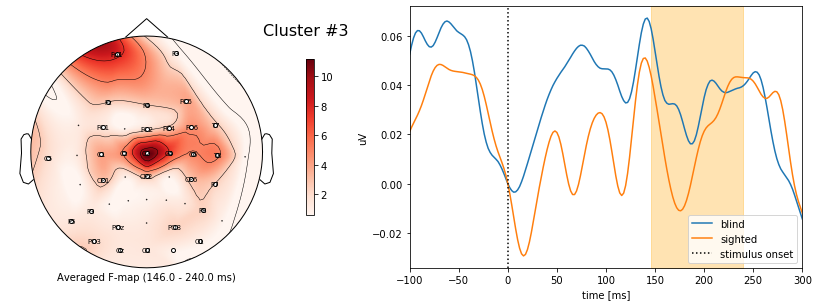

In [7]:
# nontarget blind vs sighted - letter averaged
blind = []
sighted = []
condition_names = ['blind', 'sighted']


for user in set(ds.markup.loc[ds.markup['blind'] == 1]['user']):
    for session in set(ds.markup.loc[ds.markup['user'] == user]['session_id']):
        subset_blind = ds.markup.loc[   (ds.markup['user'] == user) &
                                        (ds.markup['reg'] == 'brl_static6_all8') &
                                        (ds.markup['session_id'] == session)
                                    ]
        blind.append(aps.subset(ds, subset_blind)['nontarget'].crop(tmax=0.3).drop_channels(['ecg', 'A1', 'A2']))

for user in set(ds.markup.loc[ds.markup['blind'] == 0]['user']):
    for session in set(ds.markup.loc[ds.markup['user'] == user]['session_id']):
        subset_sighted = ds.markup.loc[ (ds.markup['user'] == user) &
                                        (ds.markup['reg'] == 'brl_static6_all8') &
                                        (ds.markup['session_id'] == session)
                                    ]
        sighted.append(aps.subset(ds, subset_sighted)['nontarget'].crop(tmax=0.3).drop_channels(['ecg', 'A1', 'A2']))


X = [np.array([a.data.T for a in blind]), 
    np.array([a.data.T for a in sighted])]
info = blind[0].info
times = blind[0].times * 1e3

stats = aps.cluster_and_plot(X, info, times, condition_names=condition_names,
                    threshold=None, n_permutations=1000, tail=1, n_jobs=1, cutoff_pval=1)

